In [1]:
import pandas as pd
import yfinance as yf
from yahoo_fin.stock_info import get_data
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings('ignore')

# requires python 3.9 min

In [2]:
# define investment amount
investment_amount = 100000

In [3]:
#List of 50 stocks/tickers
tickers = ["AAPL", "GOOGL", "AMZN", "META","TSM","MSFT", "TSLA", "NVDA", "PYPL", "INTC", "AMD", "IBM", "CSCO", "ORCL", "CRM", "ADBE", "ZM", "SQ", "DOCU", "NFLX", "SNAP", "SPOT", "DBX", "UBER", "LYFT", "WDAY", "NOW", "TEAM", "SHOP", "TWLO", "ZS", "OKTA", "MDB", "CRWD", "NET", "FSLY", "DDOG", "SNOW", "PLTR", "U", "RBLX", "AFRM", "PATH", "COUR", "COIN", "BIDU", "JD", "BABA", "TCEHY", "ZI"]

# fetch historical data for each ticker grouping
ticker_data = yf.download(tickers, start="2013-01-01", end="2023-05-08")
prices_df = ticker_data

# display the resulting DataFrame
prices_df

[*********************100%***********************]  50 of 50 completed


Adj Close                                                       \
                  AAPL        ADBE   AFRM        AMD        AMZN       BABA   
Date                                                                          
2013-01-02   16.837116   38.340000    NaN   2.530000   12.865500        NaN   
2013-01-03   16.624590   37.750000    NaN   2.490000   12.924000        NaN   
2013-01-04   16.161524   38.130001    NaN   2.590000   12.957500        NaN   
2013-01-07   16.066456   37.939999    NaN   2.670000   13.423000        NaN   
2013-01-08   16.109692   38.139999    NaN   2.670000   13.319000        NaN   
...                ...         ...    ...        ...         ...        ...   
2023-05-01  169.589996  374.149994   9.99  89.690002  102.050003  84.160004   
2023-05-02  168.539993  368.660004   9.01  89.910004  103.629997  81.529999   
2023-05-03  167.449997  345.250000   9.26  81.620003  103.650002  81.480003   
2023-05-04  165.789993  335.829987   9.13  86.610001  104.000000  82.489998   
2023-05-05  173.570007  348.399994  10.71  89.839996  105.660004  83.220001   

                                                      ...     Volume  \
                  BIDU       COIN   COUR         CRM  ...       TEAM   
Date                                                  ...              
2013-01-02  104.120003        NaN    NaN   42.792500  ...        NaN   
2013-01-03  104.980003        NaN    NaN   42.177502  ...        NaN   
2013-01-04  104.650002        NaN    NaN   42.402500  ...        NaN   
2013-01-07  102.290001        NaN    NaN   42.244999  ...        NaN   
2013-01-08  101.089996        NaN    NaN   42.492500  ...        NaN   
...                ...        ...    ...         ...  ...        ...   
2023-05-01  121.279999  50.139999  11.82  197.789993  ...  1598300.0   
2023-05-02  117.529999  51.320000  11.29  193.839996  ...  1077600.0   
2023-05-03  116.690002  48.490002  11.15  192.610001  ...  1820200.0   
2023-05-04  121.349998  49.220001  11.10  192.380005  ...  3392100.0   
2023-05-05  123.449997  58.240002  10.96  197.589996  ...  7386900.0   

                                                                             \
                 TSLA       TSM       TWLO          U         UBER     WDAY   
Date                                                                          
2013-01-02   17922000  10226100        NaN        NaN          NaN  1103500   
2013-01-03   11130000  13148600        NaN        NaN          NaN   433800   
2013-01-04   10110000   7464200        NaN        NaN          NaN   547800   
2013-01-07    6630000   9429900        NaN        NaN          NaN   348700   
2013-01-08   19260000   8112900        NaN        NaN          NaN   400100   
...               ...       ...        ...        ...          ...      ...   
2023-05-01  109015000   4931100  2334700.0  4154500.0   49867100.0  1074600   
2023-05-02  128259700   6875000  3149200.0  6748400.0  102993500.0  1883200   
2023-05-03  119728000   7151600  3264500.0  6798200.0   68580800.0  1317400   
2023-05-04   95108500   7290600  2377100.0  4267000.0   44819400.0  1141800   
2023-05-05  107440900   6863800  3281300.0  5632200.0   24676200.0  2650800   

                                              
                    ZI         ZM         ZS  
Date                                          
2013-01-02         NaN        NaN        NaN  
2013-01-03         NaN        NaN        NaN  
2013-01-04         NaN        NaN        NaN  
2013-01-07         NaN        NaN        NaN  
2013-01-08         NaN        NaN        NaN  
...                ...        ...        ...  
2023-05-01   5960500.0  2687700.0  3218400.0  
2023-05-02  11138800.0  3202700.0  5006600.0  
2023-05-03   5198300.0  3585500.0  2743400.0  
2023-05-04   4893200.0  3800600.0  2006500.0  
2023-05-05   5246600.0  3189100.0  3333800.0  

[2604 rows x 300 columns]

In [4]:
# calculate daily returns for ticker data in prices DataFrame 
daily_returns = prices_df["Close"].pct_change()

# format daily returns DataFrame to make usable with MCForecastTools
daily_returns.columns = pd.MultiIndex.from_product([daily_returns.columns, ["daily_return"]])
daily_returns=daily_returns.swaplevel(axis=1).dropna()

# display resulting DataFrame
daily_returns

daily_return                                                    \
                   AAPL      ADBE      AFRM       AMD      AMZN      BABA   
Date                                                                        
2021-04-22    -0.011685 -0.009857  0.015840 -0.031246 -0.015758 -0.000392   
2021-04-23     0.018039  0.016854  0.080152  0.046800  0.009622  0.011903   
2021-04-26     0.002978 -0.000271  0.051943  0.032020  0.020390  0.002671   
2021-04-27    -0.002450  0.003141 -0.020521 -0.002342  0.002473  0.013838   
2021-04-28    -0.006027 -0.003557  0.010999 -0.013966  0.012018  0.003391   
...                 ...       ...       ...       ...       ...       ...   
2023-05-01    -0.000530 -0.009032  0.013185  0.003581 -0.032243 -0.006258   
2023-05-02    -0.006191 -0.014673 -0.098098  0.002453  0.015483 -0.031250   
2023-05-03    -0.006467 -0.063500  0.027747 -0.092203  0.000193 -0.000613   
2023-05-04    -0.009913 -0.027285 -0.014039  0.061137  0.003377  0.012396   
2023-05-05     0.046927  0.037430  0.173056  0.037294  0.015962  0.008850   

                                                    ...                      \
                BIDU      COIN      COUR       CRM  ...      TEAM      TSLA   
Date                                                ...                       
2021-04-22 -0.000373 -0.059214  0.054945  0.003426  ...  0.008253 -0.032831   
2021-04-23  0.029735 -0.006304  0.050045  0.009336  ...  0.010374  0.013492   
2021-04-26 -0.020277  0.044376  0.029761  0.008351  ...  0.024608  0.012065   
2021-04-27 -0.000277 -0.008340 -0.023246 -0.005309  ... -0.001607 -0.045326   
2021-04-28 -0.002634 -0.013080 -0.026587  0.011400  ... -0.000678 -0.014672   
...              ...       ...       ...       ...  ...       ...       ...   
2023-05-01  0.005555 -0.067857 -0.049839 -0.002924  ...  0.012800 -0.015093   
2023-05-02 -0.030920  0.023534 -0.044839 -0.019971  ... -0.015981 -0.009393   
2023-05-03 -0.007147 -0.055144 -0.012400 -0.006345  ... -0.013727  0.001871   
2023-05-04  0.039935  0.015055 -0.004484 -0.001194  ...  0.033829  0.003673   
2023-05-05  0.017305  0.183259 -0.012613  0.027082  ... -0.095435  0.054963   

                                                                        \
                 TSM      TWLO         U      UBER      WDAY        ZI   
Date                                                                     
2021-04-22 -0.017717  0.009643  0.004238  0.009145  0.005286  0.009980   
2021-04-23  0.028789  0.029082  0.005986  0.029318  0.007314  0.035088   
2021-04-26  0.024275  0.041701  0.020583 -0.005524  0.017425  0.033314   
2021-04-27 -0.002057 -0.011955 -0.005831 -0.007811  0.008062 -0.015649   
2021-04-28 -0.013276 -0.005279  0.013172  0.022393 -0.001684  0.006704   
...              ...       ...       ...       ...       ...       ...   
2023-05-01 -0.003796 -0.012165 -0.006303  0.054428  0.001074 -0.009585   
2023-05-02 -0.012146 -0.035598 -0.055597  0.115455 -0.017227  0.012903   
2023-05-03 -0.003134 -0.005786 -0.012643  0.036145  0.001038 -0.024113   
2023-05-04  0.009553  0.019667 -0.006803 -0.009249 -0.007637 -0.041026   
2023-05-05  0.017727  0.030703  0.066076  0.006935 -0.002419 -0.000972   

                                
                  ZM        ZS  
Date                            
2021-04-22  0.017226  0.021008  
2021-04-23  0.026072  0.001210  
2021-04-26 -0.001365  0.033796  
2021-04-27 -0.008709 -0.003864  
2021-04-28 -0.006717 -0.002603  
...              ...       ...  
2023-05-01  0.004070 -0.015094  
2023-05-02 -0.007944 -0.019608  
2023-05-03 -0.006047  0.004253  
2023-05-04  0.023019  0.004235  
2023-05-05  0.018965  0.019603  

[514 rows x 50 columns]

In [5]:
# concatenate ticker DataFrame with Daily Returns DataFrame
prices_df = pd.concat([prices_df, daily_returns], axis=1, join="inner")

# display resulting DataFrame
prices_df

Adj Close                                                \
                  AAPL        ADBE       AFRM        AMD        AMZN   
Date                                                                   
2021-04-22  130.370697  507.290009  68.620003  79.059998  165.451996   
2021-04-23  132.722366  515.840027  74.120003  82.760002  167.044006   
2021-04-26  133.117630  515.700012  77.970001  85.410004  170.449997   
2021-04-27  132.791550  517.320007  76.370003  85.209999  170.871506   
2021-04-28  131.991180  515.479980  77.209999  84.019997  172.925003   
...                ...         ...        ...        ...         ...   
2023-05-01  169.589996  374.149994   9.990000  89.690002  102.050003   
2023-05-02  168.539993  368.660004   9.010000  89.910004  103.629997   
2023-05-03  167.449997  345.250000   9.260000  81.620003  103.650002   
2023-05-04  165.789993  335.829987   9.130000  86.610001  104.000000   
2023-05-05  173.570007  348.399994  10.710000  89.839996  105.660004   

                                                                       ...  \
                  BABA        BIDU        COIN       COUR         CRM  ...   
Date                                                                   ...   
2021-04-22  229.350006  214.559998  293.450012  44.160000  231.350006  ...   
2021-04-23  232.080002  220.940002  291.600006  46.369999  233.509995  ...   
2021-04-26  232.699997  216.460007  304.540009  47.750000  235.460007  ...   
2021-04-27  235.919998  216.399994  302.000000  46.639999  234.210007  ...   
2021-04-28  236.720001  215.830002  298.049988  45.400002  236.880005  ...   
...                ...         ...         ...        ...         ...  ...   
2023-05-01   84.160004  121.279999   50.139999  11.820000  197.789993  ...   
2023-05-02   81.529999  117.529999   51.320000  11.290000  193.839996  ...   
2023-05-03   81.480003  116.690002   48.490002  11.150000  192.610001  ...   
2023-05-04   82.489998  121.349998   49.220001  11.100000  192.380005  ...   
2023-05-05   83.220001  123.449997   58.240002  10.960000  197.589996  ...   

           daily_return                                                    \
                   TEAM      TSLA       TSM      TWLO         U      UBER   
Date                                                                        
2021-04-22     0.008253 -0.032831 -0.017717  0.009643  0.004238  0.009145   
2021-04-23     0.010374  0.013492  0.028789  0.029082  0.005986  0.029318   
2021-04-26     0.024608  0.012065  0.024275  0.041701  0.020583 -0.005524   
2021-04-27    -0.001607 -0.045326 -0.002057 -0.011955 -0.005831 -0.007811   
2021-04-28    -0.000678 -0.014672 -0.013276 -0.005279  0.013172  0.022393   
...                 ...       ...       ...       ...       ...       ...   
2023-05-01     0.012800 -0.015093 -0.003796 -0.012165 -0.006303  0.054428   
2023-05-02    -0.015981 -0.009393 -0.012146 -0.035598 -0.055597  0.115455   
2023-05-03    -0.013727  0.001871 -0.003134 -0.005786 -0.012643  0.036145   
2023-05-04     0.033829  0.003673  0.009553  0.019667 -0.006803 -0.009249   
2023-05-05    -0.095435  0.054963  0.017727  0.030703  0.066076  0.006935   

                                                    
                WDAY        ZI        ZM        ZS  
Date                                                
2021-04-22  0.005286  0.009980  0.017226  0.021008  
2021-04-23  0.007314  0.035088  0.026072  0.001210  
2021-04-26  0.017425  0.033314 -0.001365  0.033796  
2021-04-27  0.008062 -0.015649 -0.008709 -0.003864  
2021-04-28 -0.001684  0.006704 -0.006717 -0.002603  
...              ...       ...       ...       ...  
2023-05-01  0.001074 -0.009585  0.004070 -0.015094  
2023-05-02 -0.017227  0.012903 -0.007944 -0.019608  
2023-05-03  0.001038 -0.024113 -0.006047  0.004253  
2023-05-04 -0.007637 -0.041026  0.023019  0.004235  
2023-05-05 -0.002419 -0.000972  0.018965  0.019603  

[514 rows x 350 columns]

In [6]:
# list portfolio groupings by sharpe ratio ranking based on Risk_Return_Analysis 
high_sharpe_tickers = ['NVDA', 'MSFT', 'SHOP', 'TSLA', 'AAPL', 'NFLX', 'AMD', 'MDB', 'ADBE', 'NOW', 'AMZN', 'GOOGL', 'TSM', 'TEAM', 'META'] 
med_sharpe_tickers = ['NET', 'TCEHY', 'SQ', 'DDOG', 'OKTA', 'ZS', 'CRWD', 'CRM', 'ORCL', 'CSCO', 'WDAY', 'TWLO', 'PYPL', 'DOCU', 'JD', 'INTC'] 
low_sharpe_tickers = ['ZM', 'BIDU', 'UBER', 'FSLY', 'PLTR', 'SPOT', 'BABA', 'SNAP', 'IBM', 'DBX', 'RBLX', 'SNOW', 'ZI', 'U', 'AFRM', 'LYFT', 'COIN', 'COUR', 'PATH']

# create DataFrame for each list
high_sharpe_df = prices_df.loc[:, prices_df.columns.get_level_values(1).isin(high_sharpe_tickers)]
med_sharpe_df = prices_df.loc[:, prices_df.columns.get_level_values(1).isin(med_sharpe_tickers)]
low_sharpe_df = prices_df.loc[:, prices_df.columns.get_level_values(1).isin(low_sharpe_tickers)]


# display results of DataFrame
display(high_sharpe_df, med_sharpe_df, low_sharpe_df)


Adj Close                                                 \
                  AAPL        ADBE        AMD        AMZN       GOOGL   
Date                                                                    
2021-04-22  130.370697  507.290009  79.059998  165.451996  112.625999   
2021-04-23  132.722366  515.840027  82.760002  167.044006  114.996498   
2021-04-26  133.117630  515.700012  85.410004  170.449997  115.496498   
2021-04-27  132.791550  517.320007  85.209999  170.871506  114.549004   
2021-04-28  131.991180  515.479980  84.019997  172.925003  117.952003   
...                ...         ...        ...         ...         ...   
2023-05-01  169.589996  374.149994  89.690002  102.050003  107.199997   
2023-05-02  168.539993  368.660004  89.910004  103.629997  105.320000   
2023-05-03  167.449997  345.250000  81.620003  103.650002  105.410004   
2023-05-04  165.789993  335.829987  86.610001  104.000000  104.690002   
2023-05-05  173.570007  348.399994  89.839996  105.660004  105.570000   

                                                                        ...  \
                   MDB        META        MSFT        NFLX         NOW  ...   
Date                                                                    ...   
2021-04-22  306.690002  296.519989  252.613937  508.779999  548.489990  ...   
2021-04-23  306.179993  301.130005  256.523407  505.549988  552.700012  ...   
2021-04-26  321.230011  303.040009  256.916351  510.299988  559.210022  ...   
2021-04-27  318.010010  303.570007  257.328918  505.549988  562.630005  ...   
2021-04-28  316.399994  307.100006  250.050171  506.519989  557.239990  ...   
...                ...         ...         ...         ...         ...  ...   
2023-05-01  225.770004  243.179993  305.559998  324.119995  450.410004  ...   
2023-05-02  217.990005  239.240005  305.410004  317.549988  443.679993  ...   
2023-05-03  220.520004  237.029999  304.399994  319.299988  437.079987  ...   
2023-05-04  237.250000  233.520004  305.410004  320.779999  430.510010  ...   
2023-05-05  241.289993  232.779999  310.649994  322.760010  434.799988  ...   

           daily_return                                                    \
                    MDB      META      MSFT      NFLX       NOW      NVDA   
Date                                                                        
2021-04-22     0.022198 -0.016420 -0.013086 -0.000236  0.003696 -0.033218   
2021-04-23    -0.001663  0.015547  0.015476 -0.006349  0.007676  0.027946   
2021-04-26     0.049154  0.006343  0.001532  0.009396  0.011779  0.013937   
2021-04-27    -0.010024  0.001749  0.001606 -0.009308  0.006116 -0.006218   
2021-04-28    -0.005063  0.011628 -0.028286  0.001919 -0.009580 -0.006826   
...                 ...       ...       ...       ...       ...       ...   
2023-05-01    -0.059135  0.011901 -0.005533 -0.017610 -0.019612  0.041839   
2023-05-02    -0.034460 -0.016202 -0.000491 -0.020270 -0.014942 -0.024213   
2023-05-03     0.011606 -0.009238 -0.003307  0.005511 -0.014876 -0.014463   
2023-05-04     0.075866 -0.014808  0.003318  0.004635 -0.015032 -0.008632   
2023-05-05     0.017028 -0.003169  0.017157  0.006172  0.009965  0.040563   

                                                    
                SHOP      TEAM      TSLA       TSM  
Date                                                
2021-04-22 -0.039770  0.008253 -0.032831 -0.017717  
2021-04-23  0.002179  0.010374  0.013492  0.028789  
2021-04-26  0.060936  0.024608  0.012065  0.024275  
2021-04-27 -0.007813 -0.001607 -0.045326 -0.002057  
2021-04-28  0.114021 -0.000678 -0.014672 -0.013276  
...              ...       ...       ...       ...  
2023-05-01 -0.024149  0.012800 -0.015093 -0.003796  
2023-05-02 -0.010575 -0.015981 -0.009393 -0.012146  
2023-05-03 -0.010902 -0.013727  0.001871 -0.003134  
2023-05-04  0.238383  0.033829  0.003673  0.009553  
2023-05-05  0.082548 -0.095435  0.054963  0.017727  

[514 rows x 105 columns]

Adj Close                                                \
                   CRM        CRWD       CSCO       DDOG        DOCU   
Date                                                                   
2021-04-22  231.350006  216.729996  48.499500  84.809998  221.690002   
2021-04-23  233.509995  219.300003  48.885620  89.570000  224.839996   
2021-04-26  235.460007  224.470001  48.631344  93.139999  234.360001   
2021-04-27  234.210007  221.250000  48.377079  93.800003  230.020004   
2021-04-28  236.880005  220.240005  48.132229  91.559998  232.300003   
...                ...         ...        ...        ...         ...   
2023-05-01  197.789993  118.790001  47.340000  65.400002   49.490002   
2023-05-02  193.839996  116.739998  46.360001  64.040001   48.450001   
2023-05-03  192.610001  117.669998  45.959999  65.839996   47.400002   
2023-05-04  192.380005  117.879997  45.700001  75.400002   47.540001   
2023-05-05  197.589996  122.449997  46.250000  76.570000   48.730000   

                                                                    ...  \
                 INTC         JD        NET        OKTA       ORCL  ...   
Date                                                                ...   
2021-04-22  58.068161  73.136909  75.430000  274.959991  72.491905  ...   
2021-04-23  54.977749  73.751915  82.720001  279.299988  72.588737  ...   
2021-04-26  54.532284  73.165733  84.760002  285.350006  72.133667  ...   
2021-04-27  53.799126  75.395111  87.010002  283.000000  72.830788  ...   
2021-04-28  53.474304  75.971672  86.160004  281.839996  72.395073  ...   
...               ...        ...        ...         ...        ...  ...   
2023-05-01  30.176426  35.490002  44.720001   68.639999  94.870003  ...   
2023-05-02  29.648588  34.230000  42.880001   70.279999  94.800003  ...   
2023-05-03  30.525000  34.680000  41.900002   70.150002  94.779999  ...   
2023-05-04  31.240000  35.779999  40.480000   72.650002  94.970001  ...   
2023-05-05  30.990000  35.880001  44.070000   73.779999  96.970001  ...   

           daily_return                                                    \
                     JD       NET      OKTA      ORCL      PYPL        SQ   
Date                                                                        
2021-04-22     0.005151  0.022364  0.001530 -0.023350 -0.009891 -0.000571   
2021-04-23     0.008409  0.096646  0.015784  0.001336  0.014336  0.005385   
2021-04-26    -0.007948  0.024662  0.021661 -0.006269  0.021389  0.037901   
2021-04-27     0.030470  0.026546 -0.008236  0.009664 -0.010673 -0.007741   
2021-04-28     0.007647 -0.009769 -0.004099 -0.005983  0.008444  0.001616   
...                 ...       ...       ...       ...       ...       ...   
2023-05-01    -0.006439 -0.049522  0.001605  0.001584 -0.011711 -0.009377   
2023-05-02    -0.035503 -0.041145  0.023893 -0.000738 -0.037678 -0.040850   
2023-05-03     0.013146 -0.022854 -0.001850 -0.000211 -0.011760  0.027008   
2023-05-04     0.031719 -0.033890  0.035638  0.002005  0.005320  0.018712   
2023-05-05     0.002795  0.088686  0.015554  0.021059  0.044005 -0.019527   

                                                    
               TCEHY      TWLO      WDAY        ZS  
Date                                                
2021-04-22  0.013786  0.009643  0.005286  0.021008  
2021-04-23  0.011250  0.029082  0.007314  0.001210  
2021-04-26 -0.018337  0.041701  0.017425  0.033796  
2021-04-27  0.002117 -0.011955  0.008062 -0.003864  
2021-04-28  0.009817 -0.005279 -0.001684 -0.002603  
...              ...       ...       ...       ...  
2023-05-01 -0.006312 -0.012165  0.001074 -0.015094  
2023-05-02 -0.017922 -0.035598 -0.017227 -0.019608  
2023-05-03 -0.009009 -0.005786  0.001038  0.004253  
2023-05-04  0.003496  0.019667 -0.007637  0.004235  
2023-05-05  0.019745  0.030703 -0.002419  0.019603  

[514 rows x 112 columns]

Adj Close                                                 \
                 AFRM        BABA        BIDU        COIN       COUR   
Date                                                                   
2021-04-22  68.620003  229.350006  214.559998  293.450012  44.160000   
2021-04-23  74.120003  232.080002  220.940002  291.600006  46.369999   
2021-04-26  77.970001  232.699997  216.460007  304.540009  47.750000   
2021-04-27  76.370003  235.919998  216.399994  302.000000  46.639999   
2021-04-28  77.209999  236.720001  215.830002  298.049988  45.400002   
...               ...         ...         ...         ...        ...   
2023-05-01   9.990000   84.160004  121.279999   50.139999  11.820000   
2023-05-02   9.010000   81.529999  117.529999   51.320000  11.290000   
2023-05-03   9.260000   81.480003  116.690002   48.490002  11.150000   
2023-05-04   9.130000   82.489998  121.349998   49.220001  11.100000   
2023-05-05  10.710000   83.220001  123.449997   58.240002  10.960000   

                                                                    ...  \
                  DBX       FSLY         IBM       LYFT       PATH  ...   
Date                                                                ...   
2021-04-22  25.990000  66.889999  121.001183  61.000000  75.500000  ...   
2021-04-23  26.254999  68.919998  121.986107  63.700001  74.839996  ...   
2021-04-26  26.559999  71.120003  121.249557  63.060001  80.809998  ...   
2021-04-27  26.370001  70.730003  121.626404  62.139999  75.370003  ...   
2021-04-28  26.540001  67.779999  122.474289  63.400002  75.410004  ...   
...               ...        ...         ...        ...        ...  ...   
2023-05-01  20.350000  14.730000  124.393814  10.590000  14.150000  ...   
2023-05-02  20.030001  14.190000  123.476326  10.640000  13.580000  ...   
2023-05-03  19.879999  13.530000  121.789330  10.890000  12.660000  ...   
2023-05-04  19.620001  11.850000  120.921165  10.690000  12.510000  ...   
2023-05-05  21.309999  11.780000  121.986641   8.630000  12.870000  ...   

           daily_return                                                    \
                   PATH      PLTR      RBLX      SNAP      SNOW      SPOT   
Date                                                                        
2021-04-22     0.094203  0.010164 -0.026617 -0.021441  0.000216  0.013183   
2021-04-23    -0.008742  0.024059  0.027631  0.074496  0.018147  0.071466   
2021-04-26     0.079770  0.029902  0.043466 -0.020881  0.008954  0.048960   
2021-04-27    -0.067318 -0.009540 -0.007343  0.008164  0.001767 -0.017113   
2021-04-28     0.000531 -0.001256  0.017350  0.025285 -0.006424 -0.123174   
...                 ...       ...       ...       ...       ...       ...   
2023-05-01     0.004972  0.003871  0.011236  0.002296 -0.007496  0.036153   
2023-05-02    -0.040283 -0.024422 -0.043056 -0.048110 -0.014493 -0.014737   
2023-05-03    -0.067747 -0.003953 -0.006386 -0.028881 -0.001381  0.012244   
2023-05-04    -0.011848 -0.023810  0.007304 -0.019826  0.073493  0.017529   
2023-05-05     0.028777  0.004065  0.016531  0.040455 -0.007084  0.009040   

                                                    
                   U      UBER        ZI        ZM  
Date                                                
2021-04-22  0.004238  0.009145  0.009980  0.017226  
2021-04-23  0.005986  0.029318  0.035088  0.026072  
2021-04-26  0.020583 -0.005524  0.033314 -0.001365  
2021-04-27 -0.005831 -0.007811 -0.015649 -0.008709  
2021-04-28  0.013172  0.022393  0.006704 -0.006717  
...              ...       ...       ...       ...  
2023-05-01 -0.006303  0.054428 -0.009585  0.004070  
2023-05-02 -0.055597  0.115455  0.012903 -0.007944  
2023-05-03 -0.012643  0.036145 -0.024113 -0.006047  
2023-05-04 -0.006803 -0.009249 -0.041026  0.023019  
2023-05-05  0.066076  0.006935 -0.000972  0.018965  

[514 rows x 133 columns]

In [7]:
# determine even weighting for Monte Carlo simulations 
high_sharpe_weight = []
weight_n = len(high_sharpe_tickers)

for n in range(weight_n):
     high_sharpe_weight.append(1/weight_n)

# print(n)        
high_sharpe_weight

[0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667]

In [8]:
# determine even weighting for Monte Carlo simulations 
med_sharpe_weight = []
weight_n = len(med_sharpe_tickers)

for n in range(weight_n):
     med_sharpe_weight.append(1/weight_n)

# print(n)        
med_sharpe_weight

[0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625]

In [9]:
# determine even weighting for Monte Carlo simulations 
low_sharpe_weight = []
weight_n = len(low_sharpe_tickers)

for n in range(weight_n):
     low_sharpe_weight.append(1/weight_n)

# print(n)        
low_sharpe_weight

[0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842]

In [10]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns for high sharpe ratio portfolio
#The weights should be split evenly across the portfolio
# Run 500 samples.
MC_10_yrs_high_sharpe = MCSimulation(
    portfolio_data=high_sharpe_df,
    weights=high_sharpe_weight,
    num_simulation=500,
    num_trading_days=252*10
)

# Review the simulation input data
display(MC_10_yrs_high_sharpe.portfolio_data.head())
display(MC_10_yrs_high_sharpe.portfolio_data.tail())



Adj Close                                                 \
                  AAPL        ADBE        AMD        AMZN       GOOGL   
Date                                                                    
2021-04-22  130.370697  507.290009  79.059998  165.451996  112.625999   
2021-04-23  132.722366  515.840027  82.760002  167.044006  114.996498   
2021-04-26  133.117630  515.700012  85.410004  170.449997  115.496498   
2021-04-27  132.791550  517.320007  85.209999  170.871506  114.549004   
2021-04-28  131.991180  515.479980  84.019997  172.925003  117.952003   

                                                                        ...  \
                   MDB        META        MSFT        NFLX         NOW  ...   
Date                                                                    ...   
2021-04-22  306.690002  296.519989  252.613937  508.779999  548.489990  ...   
2021-04-23  306.179993  301.130005  256.523407  505.549988  552.700012  ...   
2021-04-26  321.230011  303.040009  256.916351  510.299988  559.210022  ...   
2021-04-27  318.010010  303.570007  257.328918  505.549988  562.630005  ...   
2021-04-28  316.399994  307.100006  250.050171  506.519989  557.239990  ...   

           daily_return                                                    \
                    MDB      META      MSFT      NFLX       NOW      NVDA   
Date                                                                        
2021-04-22     0.022198 -0.016420 -0.013086 -0.000236  0.003696 -0.033218   
2021-04-23    -0.001663  0.015547  0.015476 -0.006349  0.007676  0.027946   
2021-04-26     0.049154  0.006343  0.001532  0.009396  0.011779  0.013937   
2021-04-27    -0.010024  0.001749  0.001606 -0.009308  0.006116 -0.006218   
2021-04-28    -0.005063  0.011628 -0.028286  0.001919 -0.009580 -0.006826   

                                                    
                SHOP      TEAM      TSLA       TSM  
Date                                                
2021-04-22 -0.039770  0.008253 -0.032831 -0.017717  
2021-04-23  0.002179  0.010374  0.013492  0.028789  
2021-04-26  0.060936  0.024608  0.012065  0.024275  
2021-04-27 -0.007813 -0.001607 -0.045326 -0.002057  
2021-04-28  0.114021 -0.000678 -0.014672 -0.013276  

[5 rows x 105 columns]

Adj Close                                                 \
                  AAPL        ADBE        AMD        AMZN       GOOGL   
Date                                                                    
2023-05-01  169.589996  374.149994  89.690002  102.050003  107.199997   
2023-05-02  168.539993  368.660004  89.910004  103.629997  105.320000   
2023-05-03  167.449997  345.250000  81.620003  103.650002  105.410004   
2023-05-04  165.789993  335.829987  86.610001  104.000000  104.690002   
2023-05-05  173.570007  348.399994  89.839996  105.660004  105.570000   

                                                                        ...  \
                   MDB        META        MSFT        NFLX         NOW  ...   
Date                                                                    ...   
2023-05-01  225.770004  243.179993  305.559998  324.119995  450.410004  ...   
2023-05-02  217.990005  239.240005  305.410004  317.549988  443.679993  ...   
2023-05-03  220.520004  237.029999  304.399994  319.299988  437.079987  ...   
2023-05-04  237.250000  233.520004  305.410004  320.779999  430.510010  ...   
2023-05-05  241.289993  232.779999  310.649994  322.760010  434.799988  ...   

           daily_return                                                    \
                    MDB      META      MSFT      NFLX       NOW      NVDA   
Date                                                                        
2023-05-01    -0.059135  0.011901 -0.005533 -0.017610 -0.019612  0.041839   
2023-05-02    -0.034460 -0.016202 -0.000491 -0.020270 -0.014942 -0.024213   
2023-05-03     0.011606 -0.009238 -0.003307  0.005511 -0.014876 -0.014463   
2023-05-04     0.075866 -0.014808  0.003318  0.004635 -0.015032 -0.008632   
2023-05-05     0.017028 -0.003169  0.017157  0.006172  0.009965  0.040563   

                                                    
                SHOP      TEAM      TSLA       TSM  
Date                                                
2023-05-01 -0.024149  0.012800 -0.015093 -0.003796  
2023-05-02 -0.010575 -0.015981 -0.009393 -0.012146  
2023-05-03 -0.010902 -0.013727  0.001871 -0.003134  
2023-05-04  0.238383  0.033829  0.003673  0.009553  
2023-05-05  0.082548 -0.095435  0.054963  0.017727  

[5 rows x 105 columns]

In [11]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_yrs_high_sharpe.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994045,1.005107,0.995746,1.003699,1.015490,0.989810,0.989685,0.982971,0.988500,1.003801,...,1.009160,0.986911,0.979660,0.999766,0.997855,1.000814,0.991126,0.999286,1.010122,0.991497
2,0.996771,0.987679,1.008573,0.980558,1.006720,0.984453,0.997874,0.984124,0.990327,1.007871,...,1.003868,0.983472,0.984737,0.990981,1.001293,1.018390,0.996209,0.989765,1.008422,0.990798
3,1.008038,0.984186,1.003053,0.977321,0.993764,0.995445,0.988358,1.002508,0.992374,1.021314,...,1.003090,0.991722,0.980117,0.985855,1.007092,1.017386,0.999127,0.987989,1.014667,0.995360
4,1.001929,0.997958,1.021721,0.982962,0.986170,0.998758,0.986281,1.007398,0.988405,1.019521,...,1.001035,0.984835,0.971204,0.986300,0.999595,1.007727,1.007134,0.983384,1.022735,1.006799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.517271,1.565072,1.857940,1.020619,1.679979,1.332084,0.569212,2.219867,1.083883,1.272559,...,1.411979,3.030509,0.718639,1.489406,2.866181,2.057823,2.033864,1.151736,2.209399,1.479082
2517,1.485934,1.586594,1.874191,1.018464,1.685342,1.330863,0.575336,2.226801,1.083018,1.259947,...,1.417094,3.015447,0.739193,1.497158,2.881037,2.062548,2.040395,1.132782,2.174283,1.456711
2518,1.472768,1.613557,1.853133,1.023860,1.686060,1.322962,0.575775,2.210076,1.092827,1.254440,...,1.397815,3.019322,0.732213,1.505630,2.881435,2.049335,2.040491,1.134827,2.165151,1.456930
2519,1.469229,1.605805,1.862716,1.016374,1.701035,1.322930,0.581863,2.227436,1.095614,1.244162,...,1.397681,2.988402,0.731529,1.504154,2.914730,2.026580,2.013254,1.141682,2.176570,1.461391


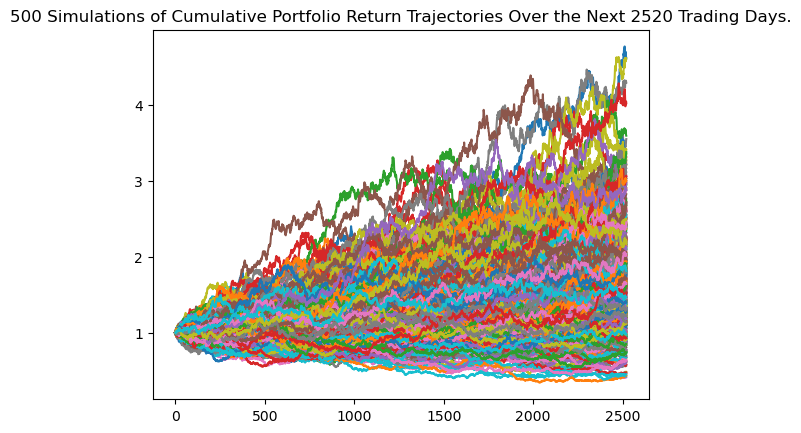

In [12]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10_yrs_high_sharpe_line_plot = MC_10_yrs_high_sharpe.plot_simulation()


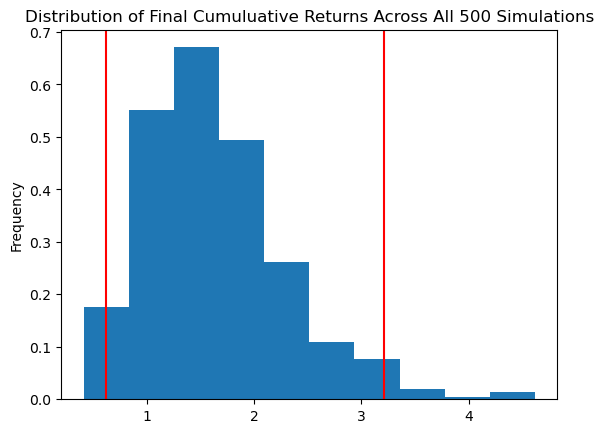

In [13]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10_yrs_high_sharpe_distribution_plot = MC_10_yrs_high_sharpe.plot_distribution()


In [14]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
MC_10_yrs_high_sharpe_sum_statistics = MC_10_yrs_high_sharpe.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
display(MC_10_yrs_high_sharpe_sum_statistics)


count           500.000000
mean              1.628703
std               0.664902
min               0.412163
25%               1.170266
50%               1.525992
75%               1.958849
max               4.616583
95% CI Lower      0.617716
95% CI Upper      3.210273
Name: 2520, dtype: float64

In [15]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the high sharpe portfolio
ci_lower_ten_cumulative_return_hs = MC_10_yrs_high_sharpe_sum_statistics[8]*investment_amount
ci_upper_ten_cumulative_return_hs = MC_10_yrs_high_sharpe_sum_statistics[9]*investment_amount

# Print the result of your calculations
print(f"There is a 95% chance that an investment of ${investment_amount} in the High Sharpe GrowWise portfolio over the next 10 years will end within the range of ${ci_lower_ten_cumulative_return_hs:.2f} and ${ci_upper_ten_cumulative_return_hs:.02f}")


There is a 95% chance that an investment of $100000 in the High Sharpe GrowWise portfolio over the next 10 years will end within the range of $61771.57 and $321027.33


In [16]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns for med sharpe ratio portfolio
#The weights should be split evenly across the portfolio
# Run 500 samples.
MC_10_yrs_med_sharpe = MCSimulation(
    portfolio_data=med_sharpe_df,
    weights=med_sharpe_weight,
    num_simulation=500,
    num_trading_days=252*10
)

In [17]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_yrs_med_sharpe.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985162,0.999466,0.991998,0.990251,0.977508,0.987748,0.979742,1.005056,0.993124,0.992791,...,0.997305,0.998603,0.983789,0.997917,1.001705,0.996716,0.998148,0.996280,0.993132,0.991161
2,0.975423,0.999431,0.975700,1.003844,0.986993,0.972277,0.977463,1.010316,0.985353,0.985922,...,0.996831,1.009784,0.984928,0.995694,0.994858,0.996441,1.005779,1.001539,0.997963,0.981210
3,0.963068,1.012729,0.975705,1.006008,0.990809,0.970225,0.964086,1.005886,0.987841,0.979945,...,0.986840,1.011233,0.974586,0.985669,0.988486,0.984671,0.999626,0.986337,0.996594,0.992109
4,0.968321,1.004727,0.969125,0.995288,0.996402,0.969542,0.965255,0.994976,0.992695,0.969262,...,0.992846,0.995498,0.969077,0.981131,0.980345,0.979346,1.007244,0.982555,0.991133,1.009105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.264253,0.194003,0.149899,0.095648,0.078498,0.072686,0.120234,0.094916,0.070943,0.163708,...,0.109793,0.118042,0.062158,0.095929,0.111464,0.113468,0.146410,0.301087,0.074190,0.086081
2517,0.264256,0.197714,0.149850,0.096044,0.079012,0.072636,0.118912,0.094703,0.070851,0.161408,...,0.110782,0.116434,0.061875,0.095161,0.109668,0.113399,0.144862,0.298126,0.074200,0.086595
2518,0.262020,0.195483,0.148747,0.095607,0.078583,0.073269,0.119851,0.094489,0.070123,0.158557,...,0.110754,0.117872,0.061358,0.095801,0.109609,0.113764,0.144645,0.298323,0.074709,0.084766
2519,0.264266,0.190874,0.146530,0.095825,0.077955,0.072305,0.120887,0.095119,0.070378,0.159304,...,0.110705,0.117663,0.061246,0.094997,0.107935,0.113541,0.144122,0.296599,0.074144,0.084405


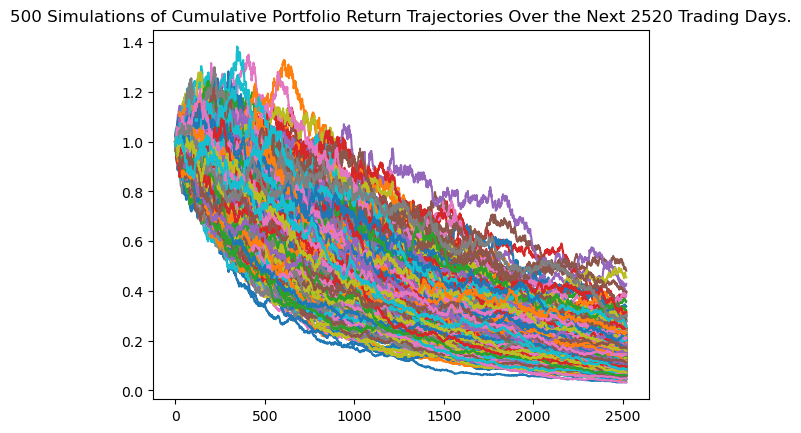

In [18]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10_yrs_med_sharpe_line_plot = MC_10_yrs_med_sharpe.plot_simulation()


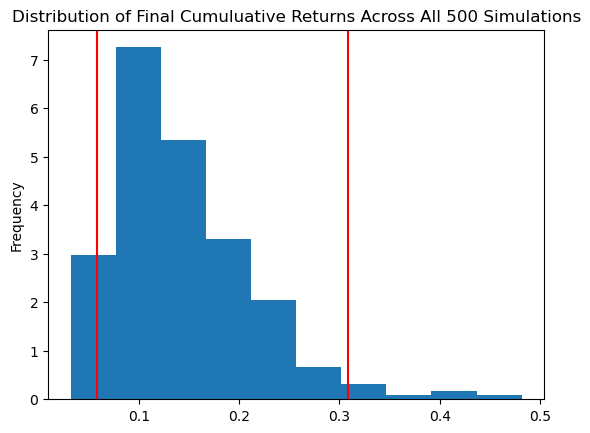

In [19]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10_yrs_med_sharpe_distribution_plot = MC_10_yrs_med_sharpe.plot_distribution()


In [20]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
MC_10_yrs_med_sharpe_sum_statistics = MC_10_yrs_med_sharpe.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
display(MC_10_yrs_med_sharpe_sum_statistics)

count           500.000000
mean              0.144209
std               0.070089
min               0.032088
25%               0.092479
50%               0.127953
75%               0.181116
max               0.481604
95% CI Lower      0.058232
95% CI Upper      0.308962
Name: 2520, dtype: float64

In [21]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the med sharpe portfolio
ci_lower_ten_cumulative_return_ms = MC_10_yrs_med_sharpe_sum_statistics[8]*investment_amount
ci_upper_ten_cumulative_return_ms = MC_10_yrs_med_sharpe_sum_statistics[9]*investment_amount

# Print the result of your calculations
print(f"There is a 95% chance that an investment of ${investment_amount} in the Med Sharpe GrowWise portfolio over the next 10 years will end within the range of ${ci_lower_ten_cumulative_return_ms:.2f} and ${ci_upper_ten_cumulative_return_ms:.02f}")


There is a 95% chance that an investment of $100000 in the Med Sharpe GrowWise portfolio over the next 10 years will end within the range of $5823.20 and $30896.25


In [22]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns for med sharpe ratio portfolio
#The weights should be split evenly across the portfolio
# Run 500 samples.
MC_10_yrs_low_sharpe = MCSimulation(
    portfolio_data=low_sharpe_df,
    weights=low_sharpe_weight,
    num_simulation=500,
    num_trading_days=252*10
)

In [23]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_yrs_low_sharpe.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992916,1.008101,1.009644,1.009402,0.998106,1.006588,1.001506,0.994776,0.991028,1.003910,...,0.982574,1.001795,1.002156,1.011115,0.999666,0.987108,0.985600,0.976721,0.993069,0.996701
2,0.975386,0.994090,1.029872,1.013539,0.997160,0.993021,1.011241,0.986795,0.996685,1.009948,...,0.976167,0.995461,0.980729,1.017311,1.016303,0.984999,0.964352,0.980078,0.980671,0.997898
3,0.969676,0.995895,1.034170,1.003092,0.999121,0.982420,0.993382,0.993316,0.995964,1.010142,...,0.977634,0.981518,0.984753,1.016685,1.034437,0.976308,0.972619,0.973449,0.988015,1.015884
4,0.963916,0.988353,1.040726,1.000858,0.998457,0.962168,1.001060,0.981139,1.005355,1.011343,...,0.991834,0.988056,0.982692,1.026559,1.036471,0.962491,0.977543,0.961564,0.975292,1.021804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.094428,0.027628,0.061609,0.047135,0.167497,0.185315,0.023770,0.037178,0.092503,0.060318,...,0.046867,0.052352,0.037473,0.030374,0.109049,0.077592,0.037898,0.026691,0.069181,0.045258
2517,0.094531,0.027602,0.061524,0.046867,0.167625,0.183734,0.023774,0.037440,0.092855,0.060290,...,0.047354,0.052037,0.036844,0.029815,0.109948,0.077075,0.036798,0.026609,0.070348,0.045157
2518,0.094218,0.026914,0.061073,0.046470,0.168926,0.185329,0.023087,0.037586,0.091726,0.059991,...,0.046972,0.051985,0.036691,0.029848,0.109242,0.077797,0.037098,0.026733,0.071320,0.045034
2519,0.095426,0.026846,0.061304,0.046993,0.167466,0.187678,0.022870,0.037635,0.091722,0.060568,...,0.046560,0.052093,0.036986,0.029448,0.109991,0.076614,0.037206,0.026419,0.070936,0.044964


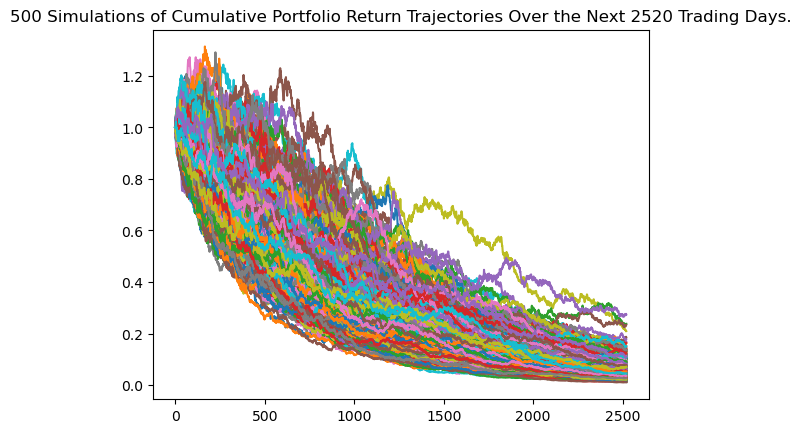

In [24]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10_yrs_low_sharpe_line_plot = MC_10_yrs_low_sharpe.plot_simulation()


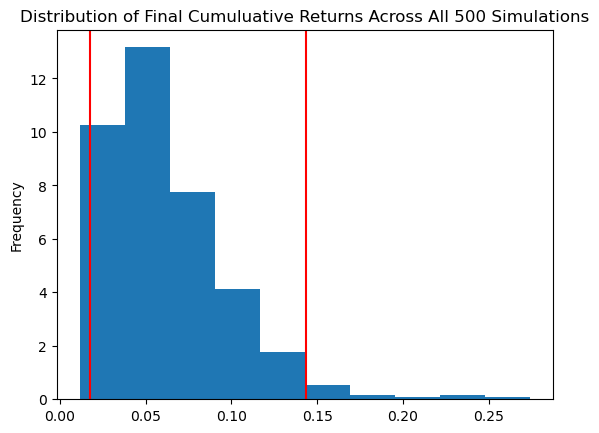

In [25]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10_yrs_low_sharpe_distribution_plot = MC_10_yrs_low_sharpe.plot_distribution()

In [26]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
MC_10_yrs_low_sharpe_sum_statistics = MC_10_yrs_low_sharpe.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
display(MC_10_yrs_low_sharpe_sum_statistics)

count           500.000000
mean              0.061526
std               0.035388
min               0.011455
25%               0.037002
50%               0.052856
75%               0.077050
max               0.274254
95% CI Lower      0.017249
95% CI Upper      0.143362
Name: 2520, dtype: float64

In [27]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the low sharpe portfolio
ci_lower_ten_cumulative_return_ls = MC_10_yrs_low_sharpe_sum_statistics[8]*investment_amount
ci_upper_ten_cumulative_return_ls = MC_10_yrs_low_sharpe_sum_statistics[9]*investment_amount

# Print the result of your calculations
print(f"There is a 95% chance that an investment of ${investment_amount} in the Low Sharpe GrowWise portfolio over the next 10 years will end within the range of ${ci_lower_ten_cumulative_return_ls:.2f} and ${ci_upper_ten_cumulative_return_ls:.02f}")


There is a 95% chance that an investment of $100000 in the Low Sharpe GrowWise portfolio over the next 10 years will end within the range of $1724.87 and $14336.17


In [28]:
# list portfolio groupings by beta ratio ranking based on Risk_Return_Analysis 
high_beta_tickers = ['AFRM', 'COIN','U','FSLY', 'NET', 'RBLX', 'PATH', 'LYFT', 'DDOG', 'UBER', 'SQ', 'SNOW', 'MDB', 'CRWD', 'PLTR'] 
med_beta_tickers = ['DOCU', 'ZI', 'SHOP', 'SNAP', 'ZS', 'COUR', 'TWLO', 'SPOT', 'OKTA', 'NVDA', 'AMD', 'PYPL', 'DBX', 'TSLA','TEAM','NOW'] 
low_beta_tickers = ['ADBE', 'WDAY','CRM', 'META', 'JD', 'MSFT', 'INTC', 'NFLX', 'AAPL', 'AMZN', 'GOOGL', 'BIDU', 'BABA', 'ZM', 'TSM', 'CSCO', 'ORCL', 'TCEHY', 'IBM']


# create DataFrame for each list
high_beta_df = prices_df.loc[:, prices_df.columns.get_level_values(1).isin(high_beta_tickers)]
med_beta_df = prices_df.loc[:, prices_df.columns.get_level_values(1).isin(med_beta_tickers)]
low_beta_df = prices_df.loc[:, prices_df.columns.get_level_values(1).isin(low_beta_tickers)]


# display results of DataFrame
#display(high_sharpe_df, med_sharpe_df, low_sharpe_df)

In [49]:
# determine even weighting for Monte Carlo simulations 
high_beta_weight = []
weight_n = len(high_beta_tickers)
for n in range(weight_n):
     high_beta_weight.append(1/weight_n)

med_beta_weight = []
weight_n = len(med_beta_tickers)
for n in range(weight_n):
     med_beta_weight.append(1/weight_n)
        
low_beta_weight = []
weight_n = len(low_beta_tickers)
for n in range(weight_n):
     low_beta_weight.append(1/weight_n)
        
        
# print(n)        
#high_beta_weight
#med_beta_weight
#low_beta_weight


In [30]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns for high beta portfolio
#The weights should be split evenly across the portfolio
# Run 500 samples.
MC_10_yrs_high_beta = MCSimulation(
    portfolio_data=high_beta_df,
    weights=high_beta_weight,
    num_simulation=500,
    num_trading_days=252*10
)

In [31]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_yrs_high_beta.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996911,0.992169,1.000012,0.992351,0.987421,1.002667,1.006717,1.000232,0.980960,1.012535,...,1.001248,1.004892,1.002392,0.984257,0.992394,1.003130,1.012654,0.985762,1.000398,0.995939
2,1.006871,0.983660,0.983273,0.981258,0.988212,0.991328,1.008642,0.998739,0.999448,1.013162,...,0.987707,1.003990,0.997330,0.975754,1.022487,1.000495,1.024147,0.975329,0.987528,0.998245
3,1.001028,0.977527,0.995569,0.983065,0.989090,0.997691,0.994287,0.985673,0.985875,1.014481,...,0.996468,0.990753,1.004907,0.972250,1.035858,0.997913,1.021234,0.959855,0.959189,1.003596
4,0.971527,0.978873,0.996192,0.993131,1.003806,0.983368,0.984474,1.008963,0.970676,1.019340,...,0.996776,1.003655,1.016642,0.979118,1.044965,1.010411,1.015167,0.970729,0.980855,0.999924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.080518,0.171490,0.099992,0.210537,0.072114,0.040657,0.074069,0.057065,0.149564,0.104309,...,0.111352,0.063683,0.157342,0.062146,0.051814,0.067074,0.073612,0.139102,0.071618,0.343561
2517,0.078801,0.169167,0.099600,0.202825,0.071256,0.039705,0.074207,0.055918,0.148713,0.104192,...,0.110620,0.063392,0.156559,0.063113,0.052430,0.068562,0.071694,0.137343,0.072109,0.340543
2518,0.079955,0.171259,0.099217,0.200445,0.070812,0.039917,0.073970,0.056512,0.146851,0.103934,...,0.111347,0.063165,0.157005,0.062506,0.052095,0.067491,0.071351,0.135663,0.071612,0.338960
2519,0.080671,0.169978,0.098779,0.201018,0.070627,0.040521,0.074085,0.057501,0.145640,0.105701,...,0.111811,0.061512,0.157768,0.062572,0.050677,0.067377,0.071014,0.132645,0.070868,0.337911


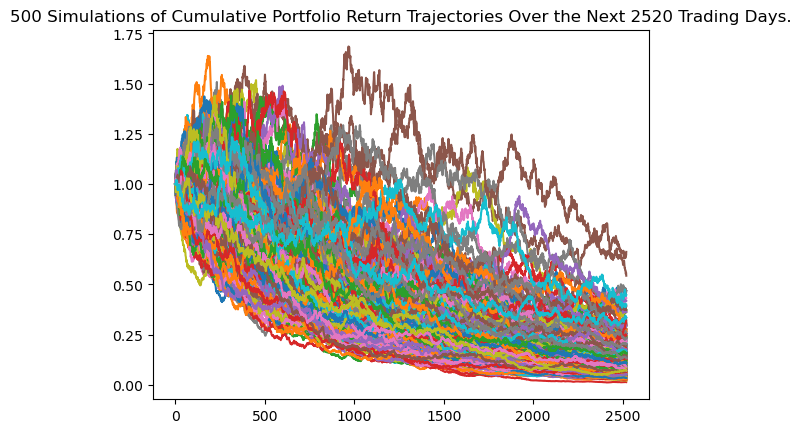

In [32]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10_yrs_high_beta_line_plot = MC_10_yrs_high_beta.plot_simulation()

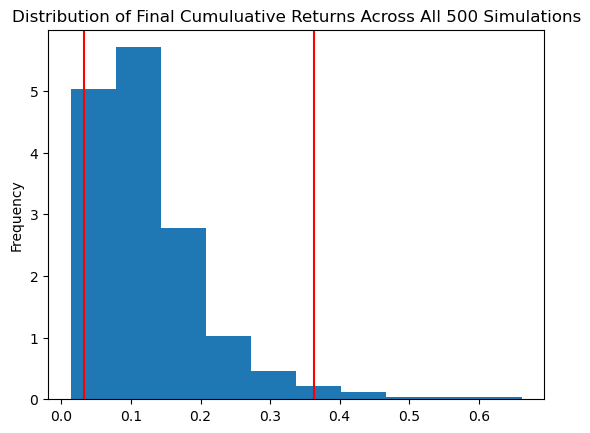

In [33]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10_yrs_high_beta_distribution_plot = MC_10_yrs_high_beta.plot_distribution()


In [34]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
MC_10_yrs_high_beta_sum_statistics = MC_10_yrs_high_beta.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
display(MC_10_yrs_high_beta_sum_statistics)

count           500.000000
mean              0.125286
std               0.083353
min               0.013305
25%               0.068439
50%               0.105079
75%               0.155161
max               0.661630
95% CI Lower      0.032947
95% CI Upper      0.362864
Name: 2520, dtype: float64

In [35]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the high beta portfolio
ci_lower_ten_cumulative_return_hb = MC_10_yrs_high_beta_sum_statistics[8]*investment_amount
ci_upper_ten_cumulative_return_hb = MC_10_yrs_high_beta_sum_statistics[9]*investment_amount

# Print the result of your calculations
print(f"There is a 95% chance that an investment of ${investment_amount} in the High Beta GrowWise portfolio over the next 10 years will end within the range of ${ci_lower_ten_cumulative_return_hb:.2f} and ${ci_upper_ten_cumulative_return_hb:.02f}")


There is a 95% chance that an investment of $100000 in the High Beta GrowWise portfolio over the next 10 years will end within the range of $3294.68 and $36286.44


In [36]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns for med beta portfolio
#The weights should be split evenly across the portfolio
# Run 500 samples.
MC_10_yrs_med_beta = MCSimulation(
    portfolio_data=med_beta_df,
    weights=med_beta_weight,
    num_simulation=500,
    num_trading_days=252*10
)

In [37]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_yrs_med_beta.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001281,1.001742,1.001981,1.010173,0.995288,0.988900,1.010711,1.028785,0.986645,0.999460,...,0.996555,1.004291,1.006534,1.000180,1.001073,0.995597,0.980946,0.994880,0.998412,0.985094
2,0.994710,1.000389,0.989678,0.998573,0.988585,0.975297,1.010480,1.030228,0.992431,1.007919,...,0.987049,1.010245,1.015377,1.019348,0.991843,0.996856,0.975095,1.005149,0.986680,0.978623
3,0.985257,1.011816,0.988245,1.004218,0.979826,0.994832,1.009449,1.040798,0.984958,1.005425,...,0.978793,1.013539,1.025234,1.019025,0.992752,1.001573,0.960382,0.973821,0.995611,0.982677
4,0.992327,1.012170,0.980915,0.998955,0.981516,0.997287,1.014286,1.040157,0.982757,1.006256,...,0.979894,1.025127,1.032608,1.006037,0.995087,0.988582,0.953262,0.973453,0.997847,0.985445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.066453,0.109400,0.269917,0.136146,0.197523,0.079445,0.064522,0.201024,0.169106,0.301130,...,0.107949,0.095848,0.159263,0.043914,0.116719,0.101803,0.255046,0.095922,0.065644,0.204450
2517,0.066772,0.109570,0.269386,0.135720,0.197450,0.079637,0.064714,0.202729,0.168107,0.300128,...,0.108369,0.096390,0.156693,0.044138,0.114940,0.100951,0.253385,0.095536,0.065342,0.205102
2518,0.065810,0.110475,0.273367,0.135451,0.191032,0.079599,0.064979,0.201948,0.167821,0.299627,...,0.106014,0.096156,0.155869,0.044244,0.116166,0.099913,0.251952,0.095754,0.064959,0.202660
2519,0.064951,0.110602,0.275022,0.134269,0.190179,0.079272,0.065181,0.204886,0.166289,0.296429,...,0.105172,0.098795,0.154468,0.044073,0.115817,0.100429,0.251412,0.096712,0.065497,0.202589


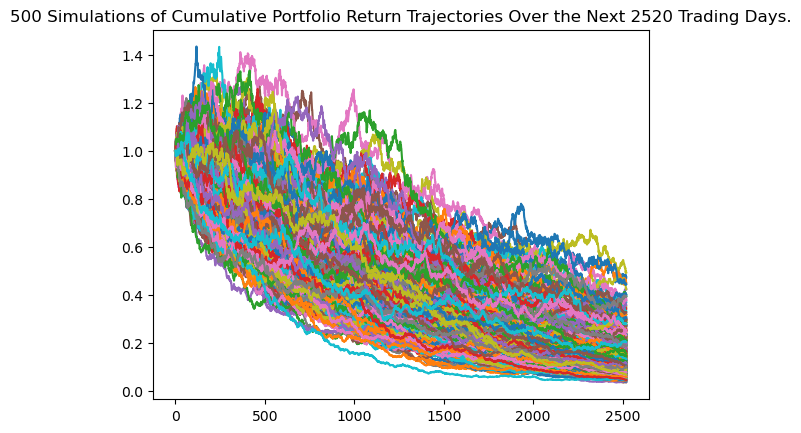

In [38]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10_yrs_med_beta_line_plot = MC_10_yrs_med_beta.plot_simulation()

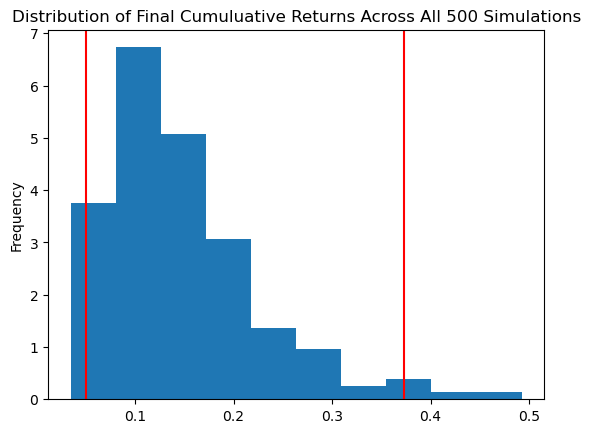

In [39]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10_yrs_med_beta_distribution_plot = MC_10_yrs_med_beta.plot_distribution()

In [40]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
MC_10_yrs_med_beta_sum_statistics = MC_10_yrs_med_beta.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
display(MC_10_yrs_med_beta_sum_statistics)

count           500.000000
mean              0.147498
std               0.077922
min               0.034767
25%               0.095121
50%               0.129770
75%               0.185018
max               0.492298
95% CI Lower      0.050601
95% CI Upper      0.372563
Name: 2520, dtype: float64

In [41]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the med beta portfolio
ci_lower_ten_cumulative_return_mb = MC_10_yrs_med_beta_sum_statistics[8]*investment_amount
ci_upper_ten_cumulative_return_mb = MC_10_yrs_med_beta_sum_statistics[9]*investment_amount

# Print the result of your calculations
print(f"There is a 95% chance that an investment of ${investment_amount} in the Med Beta GrowWise portfolio over the next 10 years will end within the range of ${ci_lower_ten_cumulative_return_mb:.2f} and ${ci_upper_ten_cumulative_return_mb:.02f}")


There is a 95% chance that an investment of $100000 in the Med Beta GrowWise portfolio over the next 10 years will end within the range of $5060.15 and $37256.26


In [42]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns for low beta portfolio
#The weights should be split evenly across the portfolio
# Run 500 samples.
MC_10_yrs_low_beta = MCSimulation(
    portfolio_data=low_beta_df,
    weights=low_beta_weight,
    num_simulation=500,
    num_trading_days=252*10
)

In [43]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_yrs_low_beta.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006537,0.997476,0.986343,1.006712,1.013104,0.994756,1.000173,1.001530,1.001396,1.008563,...,0.993818,0.989300,1.002485,1.010908,0.997114,0.991774,0.996072,1.002136,1.003679,0.993283
2,1.004656,1.000531,1.002771,1.003794,1.002757,0.986768,0.996140,1.002300,1.004671,1.000708,...,0.999973,0.990238,0.999786,0.999849,1.001877,0.987642,0.994115,1.010911,1.009409,0.982397
3,0.998457,1.003554,1.001046,0.996139,1.012456,0.982691,0.982578,0.996894,1.013425,0.993488,...,1.000628,0.988126,1.008899,0.998776,0.992430,0.983028,0.989186,1.015003,1.011851,0.985156
4,0.998845,0.996249,0.997648,1.000193,1.014742,0.983281,0.985165,1.000609,1.018897,0.992836,...,0.999362,0.994114,1.007778,0.997421,0.994322,0.977896,0.996914,1.010421,1.008865,0.983985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.567278,0.334680,0.330086,0.477579,0.704249,0.156764,0.242017,0.190224,0.692737,0.412002,...,0.273624,0.446099,0.527583,0.362829,0.482338,0.324889,0.482063,0.272627,0.285019,0.369367
2517,0.559513,0.334576,0.330436,0.476065,0.699339,0.155304,0.242948,0.192833,0.695786,0.413808,...,0.272882,0.450647,0.529212,0.363236,0.480691,0.323392,0.486898,0.271418,0.283947,0.370854
2518,0.562353,0.336232,0.329012,0.475422,0.701315,0.155064,0.241921,0.191544,0.693071,0.413993,...,0.272946,0.454407,0.527692,0.365219,0.486812,0.321939,0.485763,0.268982,0.285857,0.373603
2519,0.563176,0.334922,0.325118,0.474058,0.705217,0.154341,0.242638,0.193902,0.693633,0.415118,...,0.270933,0.457922,0.528822,0.363323,0.489169,0.319112,0.484037,0.266106,0.282802,0.374238


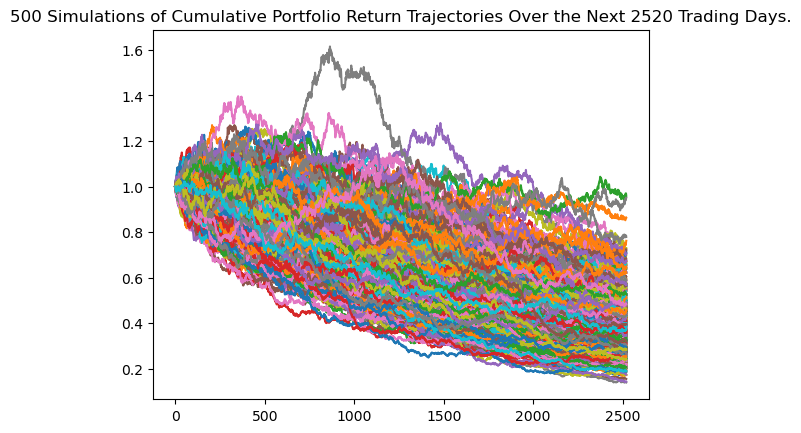

In [44]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10_yrs_low_beta_line_plot = MC_10_yrs_low_beta.plot_simulation()

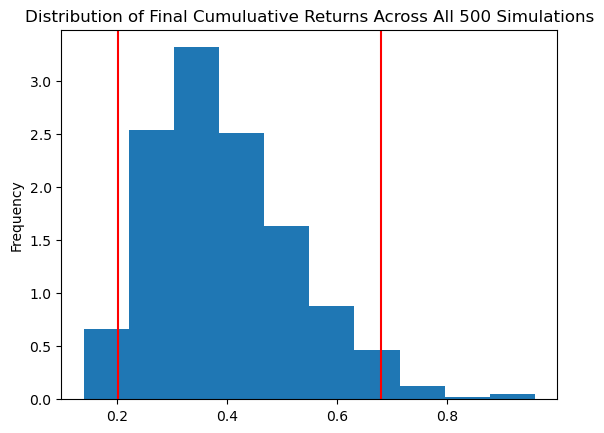

In [45]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10_yrs_low_beta_distribution_plot = MC_10_yrs_low_beta.plot_distribution()

In [46]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
MC_10_yrs_low_beta_sum_statistics = MC_10_yrs_low_beta.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
display(MC_10_yrs_low_beta_sum_statistics)

count           500.000000
mean              0.394255
std               0.128892
min               0.139316
25%               0.297970
50%               0.372707
75%               0.469703
max               0.958884
95% CI Lower      0.201180
95% CI Upper      0.678965
Name: 2520, dtype: float64

In [47]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the low beta portfolio
ci_lower_ten_cumulative_return_lb = MC_10_yrs_low_beta_sum_statistics[8]*investment_amount
ci_upper_ten_cumulative_return_lb = MC_10_yrs_low_beta_sum_statistics[9]*investment_amount

# Print the result of your calculations
print(f"There is a 95% chance that an investment of ${investment_amount} in the Low Beta GrowWise portfolio over the next 10 years will end within the range of ${ci_lower_ten_cumulative_return_lb:.2f} and ${ci_upper_ten_cumulative_return_lb:.02f}")


There is a 95% chance that an investment of $100000 in the Low Beta GrowWise portfolio over the next 10 years will end within the range of $20118.03 and $67896.50


In [50]:
# list portfolio groupings by beta ratio ranking based on Risk_Return_Analysis 
high_correlation_tickers = ['AFRM', 'COIN','U','FSLY', 'NET', 'RBLX', 'PATH', 'LYFT', 'DDOG', 'UBER', 'SQ', 'SNOW', 'MDB', 'CRWD', 'PLTR'] 
med_correlation_tickers = ['DOCU', 'ZI', 'SHOP', 'SNAP', 'ZS', 'COUR', 'TWLO', 'SPOT', 'OKTA', 'NVDA', 'AMD', 'PYPL', 'DBX', 'TSLA','TEAM','NOW'] 
low_correlation_tickers = ['ADBE', 'WDAY','CRM', 'META', 'JD', 'MSFT', 'INTC', 'NFLX', 'AAPL', 'AMZN', 'GOOGL', 'BIDU', 'BABA', 'ZM', 'TSM', 'CSCO', 'ORCL', 'TCEHY', 'IBM']


# create DataFrame for each list
high_correlation_df = prices_df.loc[:, prices_df.columns.get_level_values(1).isin(high_correlation_tickers)]
med_correlation_df = prices_df.loc[:, prices_df.columns.get_level_values(1).isin(med_correlation_tickers)]
low_correlation_df = prices_df.loc[:, prices_df.columns.get_level_values(1).isin(low_correlation_tickers)]


# display results of DataFrame
#display(high_correlation_df, med_correlation_df, low_correlation_df)

In [51]:
# determine even weighting for Monte Carlo simulations 
high_correlation_weight = []
weight_n = len(high_correlation_tickers)
for n in range(weight_n):
     high_correlation_weight.append(1/weight_n)

med_correlation_weight = []
weight_n = len(med_correlation_tickers)
for n in range(weight_n):
     med_correlation_weight.append(1/weight_n)
        
low_correlation_weight = []
weight_n = len(low_correlation_tickers)
for n in range(weight_n):
     low_correlation_weight.append(1/weight_n)
        
        
# print(n)        
#high_correlation_weight
#med_correlation_weight
#low_correlation_weight

In [52]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns for high correlation portfolio
#The weights should be split evenly across the portfolio
# Run 500 samples.
MC_10_yrs_high_correlation = MCSimulation(
    portfolio_data=high_correlation_df,
    weights=high_correlation_weight,
    num_simulation=500,
    num_trading_days=252*10
)


In [53]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_yrs_high_correlation.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997547,0.997988,0.995143,1.015101,0.973261,0.980032,0.996282,1.002723,1.014093,0.981556,...,0.989418,0.990387,1.009104,0.985110,0.977311,1.026601,0.993233,0.986785,1.007239,1.022339
2,0.994982,1.027846,0.989324,1.005049,0.983465,0.991431,1.005825,1.028001,1.021466,0.978016,...,0.988128,0.998959,1.028710,0.988119,0.960311,1.027324,0.986964,0.999580,1.012994,1.022934
3,0.975749,1.014192,0.995500,1.024489,0.973885,1.006008,1.022216,1.037343,1.054234,0.958855,...,0.994386,1.004112,1.030278,0.992806,0.956378,1.033222,0.985224,0.985403,1.026675,1.038422
4,0.979557,1.012127,0.993802,1.027740,0.970151,1.023708,1.011667,1.045600,1.093362,0.966302,...,0.973392,1.018955,1.018980,1.034223,0.967272,1.031530,0.987394,0.994559,1.012786,1.014695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.059510,0.127466,0.144032,0.658587,0.163174,0.115961,0.061640,0.194641,0.078045,0.159959,...,0.095699,0.589317,0.056323,0.140554,0.102734,0.224902,0.101500,0.110348,0.160276,0.313497
2517,0.059051,0.125463,0.144148,0.650641,0.162056,0.117076,0.061370,0.194457,0.078517,0.153433,...,0.097232,0.567031,0.056328,0.140225,0.103660,0.217574,0.101056,0.112160,0.164063,0.320909
2518,0.058847,0.123590,0.139912,0.634349,0.164263,0.117966,0.061368,0.194859,0.078952,0.154469,...,0.099163,0.561307,0.057174,0.140025,0.103036,0.215391,0.101958,0.111440,0.166199,0.313276
2519,0.059590,0.123147,0.138588,0.639876,0.162229,0.120004,0.060650,0.195457,0.078773,0.151167,...,0.102903,0.558307,0.057438,0.138788,0.101961,0.220387,0.102535,0.111581,0.164408,0.321374


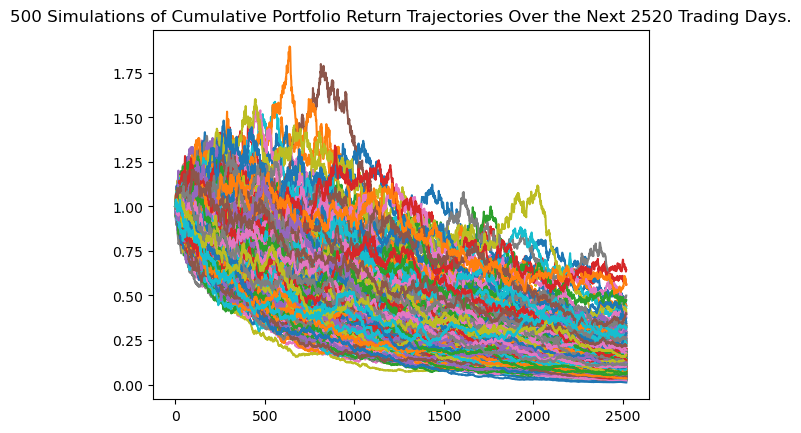

In [54]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10_yrs_high_correlation_line_plot = MC_10_yrs_high_correlation.plot_simulation()


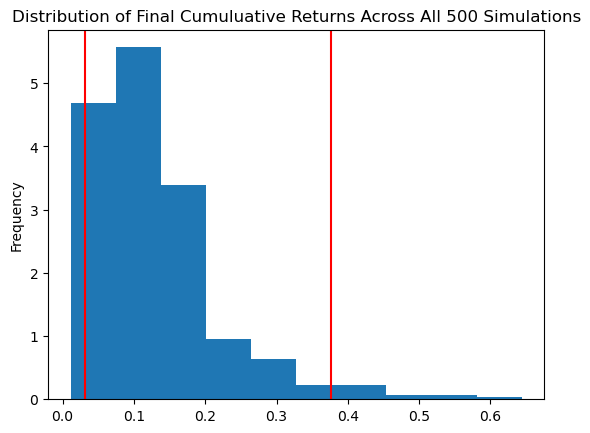

In [55]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10_yrs_high_correlation_distribution_plot = MC_10_yrs_high_correlation.plot_distribution()


In [56]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
MC_10_yrs_high_correlation_sum_statistics = MC_10_yrs_high_correlation.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
display(MC_10_yrs_high_correlation_sum_statistics)


count           500.000000
mean              0.129526
std               0.089141
min               0.011360
25%               0.070568
50%               0.105659
75%               0.161767
max               0.643686
95% CI Lower      0.031252
95% CI Upper      0.377050
Name: 2520, dtype: float64

In [57]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the high correlation portfolio
ci_lower_ten_cumulative_return_hc = MC_10_yrs_high_correlation_sum_statistics[8]*investment_amount
ci_upper_ten_cumulative_return_hc = MC_10_yrs_high_correlation_sum_statistics[9]*investment_amount

# Print the result of your calculations
print(f"There is a 95% chance that an investment of ${investment_amount} in the High Correlation GrowWise portfolio over the next 10 years will end within the range of ${ci_lower_ten_cumulative_return_hc:.2f} and ${ci_upper_ten_cumulative_return_hc:.02f}")


There is a 95% chance that an investment of $100000 in the High Correlation GrowWise portfolio over the next 10 years will end within the range of $3125.19 and $37705.01


In [58]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns for high beta portfolio
#The weights should be split evenly across the portfolio
# Run 500 samples.
MC_10_yrs_med_correlation = MCSimulation(
    portfolio_data=med_correlation_df,
    weights=med_correlation_weight,
    num_simulation=500,
    num_trading_days=252*10
)

In [59]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_yrs_med_correlation.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995136,1.007161,1.003594,0.998028,1.000804,1.017534,0.994838,0.999729,0.995335,0.989078,...,0.995514,0.999328,0.995925,0.988275,0.999835,0.988446,1.005397,0.990980,1.010884,0.997726
2,0.980846,1.017345,1.002555,0.985761,1.003570,1.009643,1.000326,0.983931,0.978353,0.986841,...,0.988850,1.008095,0.999161,1.004014,0.979512,0.978878,0.986764,0.988050,1.027997,0.982221
3,0.965751,1.002206,0.983766,0.986553,1.014275,1.008152,1.014147,0.994426,0.980979,0.987609,...,0.989097,0.997047,0.994294,0.990998,0.979324,0.974498,0.975791,0.975619,1.016825,0.975460
4,0.970837,0.999127,0.974411,0.979311,1.018753,0.990038,1.009448,1.000621,0.980967,0.996090,...,0.978487,1.003695,1.009234,0.991959,0.973476,0.974645,0.968656,0.979523,1.030795,0.975855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.081579,0.159023,0.113180,0.240565,0.197435,0.193763,0.045033,0.159373,0.169560,0.098690,...,0.121367,0.131486,0.113449,0.133576,0.076264,0.118253,0.218732,0.287617,0.111441,0.108244
2517,0.081609,0.158118,0.112861,0.238012,0.197647,0.194268,0.045508,0.157972,0.171538,0.098048,...,0.121164,0.129350,0.111859,0.132288,0.076625,0.118431,0.213932,0.286532,0.110709,0.109013
2518,0.081862,0.155287,0.113275,0.238621,0.198129,0.199174,0.045293,0.157069,0.171783,0.097114,...,0.120006,0.128153,0.113559,0.131164,0.075665,0.120395,0.211702,0.284414,0.111468,0.109759
2519,0.082507,0.153508,0.113479,0.235025,0.197634,0.198907,0.045314,0.158436,0.173470,0.097657,...,0.118274,0.126935,0.112541,0.132193,0.076344,0.121200,0.213418,0.279580,0.111963,0.108257


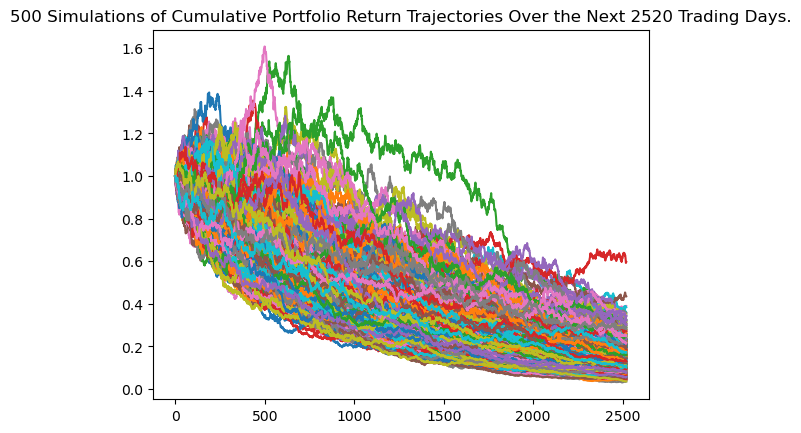

In [60]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10_yrs_med_correlation_line_plot = MC_10_yrs_med_correlation.plot_simulation()


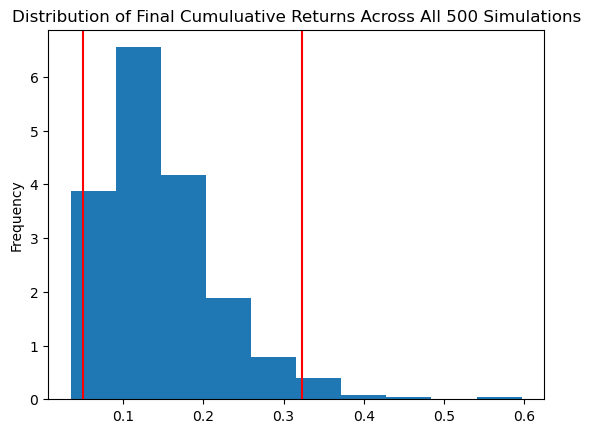

In [61]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10_yrs_med_correlation_distribution_plot = MC_10_yrs_med_correlation.plot_distribution()

In [62]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
MC_10_yrs_med_correlation_sum_statistics = MC_10_yrs_med_correlation.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
display(MC_10_yrs_med_correlation_sum_statistics)


count           500.000000
mean              0.147097
std               0.071840
min               0.034740
25%               0.097199
50%               0.131714
75%               0.183277
max               0.596620
95% CI Lower      0.049925
95% CI Upper      0.322364
Name: 2520, dtype: float64

In [63]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the med correlation portfolio
ci_lower_ten_cumulative_return_mc = MC_10_yrs_high_beta_sum_statistics[8]*investment_amount
ci_upper_ten_cumulative_return_mc = MC_10_yrs_high_beta_sum_statistics[9]*investment_amount

# Print the result of your calculations
print(f"There is a 95% chance that an investment of ${investment_amount} in the Med Correlation GrowWise portfolio over the next 10 years will end within the range of ${ci_lower_ten_cumulative_return_mc:.2f} and ${ci_upper_ten_cumulative_return_mc:.02f}")


There is a 95% chance that an investment of $100000 in the Med Correlation GrowWise portfolio over the next 10 years will end within the range of $3294.68 and $36286.44


In [64]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns for low correlation portfolio
#The weights should be split evenly across the portfolio
# Run 500 samples.
MC_10_yrs_low_correlation = MCSimulation(
    portfolio_data=low_correlation_df,
    weights=low_correlation_weight,
    num_simulation=500,
    num_trading_days=252*10
)

In [65]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_yrs_low_correlation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997894,0.999764,1.001958,0.998757,1.001849,0.990808,0.993632,1.004967,1.008770,0.994502,...,1.021592,0.998074,1.001253,0.997463,1.004556,1.007885,0.994356,1.001269,1.000059,0.994335
2,1.003172,1.011828,0.999035,0.995731,1.006805,0.986842,1.000584,1.011157,1.008150,1.001945,...,1.007357,0.999410,0.995879,1.000328,1.008120,1.015689,0.999487,0.999604,1.001061,1.002940
3,1.001242,1.015032,1.007771,1.001674,0.995515,0.989025,0.990664,1.015048,1.020645,0.997863,...,1.009146,1.000450,0.996704,0.997996,1.004173,1.016094,0.991917,0.993770,1.013905,0.998063
4,0.997758,1.018434,0.997590,1.003965,0.993565,0.989374,0.993404,1.026597,1.033835,0.996231,...,1.010034,0.993444,0.992430,0.988540,1.000195,1.004799,0.991127,0.994477,1.020817,0.995720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.497565,0.322278,0.326538,0.478946,0.299134,0.363075,0.305552,0.406331,0.380956,0.624084,...,0.410482,0.223605,0.308914,0.319280,0.365213,0.267733,0.277119,0.557050,0.309624,0.305747
2517,0.494523,0.320400,0.325403,0.483454,0.303317,0.365004,0.307318,0.408448,0.383250,0.618779,...,0.410040,0.224849,0.310004,0.315736,0.360138,0.266173,0.275997,0.558080,0.308079,0.308154
2518,0.493552,0.322698,0.324285,0.484747,0.301024,0.364372,0.302472,0.409121,0.382524,0.618904,...,0.410781,0.227084,0.307946,0.316954,0.361374,0.263138,0.276147,0.553489,0.306858,0.306841
2519,0.489707,0.319244,0.326774,0.487780,0.300744,0.359267,0.298707,0.411214,0.386553,0.617110,...,0.413668,0.227566,0.308410,0.320092,0.362437,0.263336,0.276070,0.557774,0.303932,0.307573


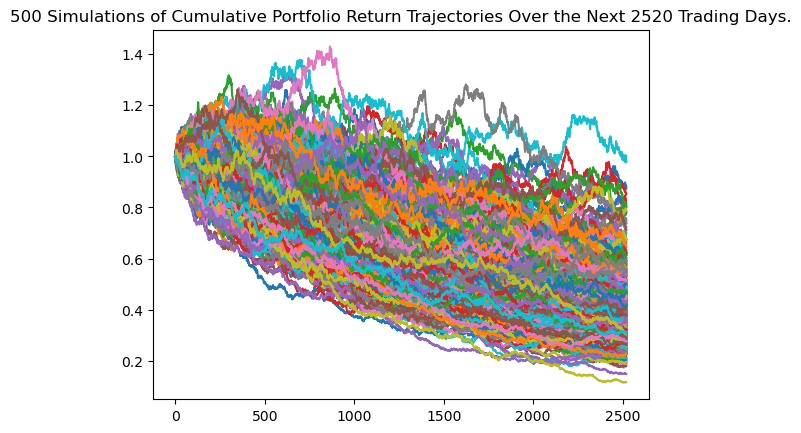

In [66]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10_yrs_low_correlation_line_plot = MC_10_yrs_low_correlation.plot_simulation()


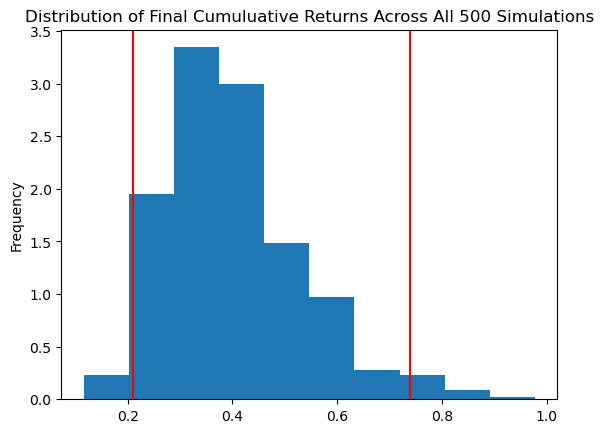

In [67]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10_yrs_low_correlation_distribution_plot = MC_10_yrs_low_correlation.plot_distribution()

In [68]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
MC_10_yrs_low_correlation_sum_statistics = MC_10_yrs_low_correlation.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
display(MC_10_yrs_low_correlation_sum_statistics)


count           500.000000
mean              0.403050
std               0.131884
min               0.116350
25%               0.307992
50%               0.381752
75%               0.467683
max               0.977480
95% CI Lower      0.209711
95% CI Upper      0.738516
Name: 2520, dtype: float64

In [70]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the low correlation portfolio
ci_lower_ten_cumulative_return_lc = MC_10_yrs_low_correlation_sum_statistics[8]*investment_amount
ci_upper_ten_cumulative_return_lc = MC_10_yrs_low_correlation_sum_statistics[9]*investment_amount

# Print the result of your calculations
print(f"There is a 95% chance that an investment of ${investment_amount} in the Low Correlation GrowWise portfolio over the next 10 years will end within the range of ${ci_lower_ten_cumulative_return_lc:.2f} and ${ci_upper_ten_cumulative_return_lc:.02f}")

There is a 95% chance that an investment of $100000 in the Low Correlation GrowWise portfolio over the next 10 years will end within the range of $20971.12 and $73851.57
